In [1]:
%load_ext autotime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from activation import Activation
from preprocessing import PreProcess, binary_label
from neural_net import NeuralNetwork
from layers import Dense
from other import CrossEntropy
from other import StochasticGradientDescent as SGD

time: 917 ms


In [3]:
pre = PreProcess("Assignment_4_data.txt")
X_train, X_test, y_train, y_test = pre.process(test_size=0.2) 
y_train = binary_label(y_train)
y_test = binary_label(y_test)
y_test.shape

(1115, 2)

time: 5.16 s


In [4]:
n_features = X_train.shape[1]
n_features

8404

time: 3.54 ms


In [5]:
activation = 'sigmoid'
neurons = 100
network = NeuralNetwork(optimizer= SGD(learning_rate=0.1), loss=CrossEntropy, \
                        validation_data=(X_test, y_test))
network.add(Dense(neurons, input_shape=(n_features,))).add(Activation(activation))
for _ in range(1):
    network.add(Dense(neurons)).add(Activation(activation))
network.add(Dense(2)).add(Activation('softmax'))

<neural_net.NeuralNetwork instance at 0x7fba922bf320>

time: 85.8 ms


In [6]:
train_err, test_err = network.fit(X_train, y_train, n_epochs=50, batch_size=200)

time: 18.7 s


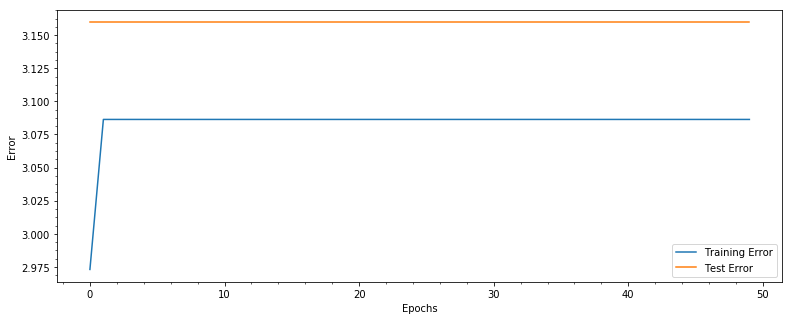

time: 199 ms


In [7]:
fig, ax = plt.subplots(1, 1, figsize=(13,5))
ax.plot(train_err, label="Training Error")
ax.plot(test_err, label="Test Error")
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend()
plt.minorticks_on()
plt.show()

In [8]:
y_pred = network.predict(X_test)
accuracy = CrossEntropy.accuracy_score(np.argmax(y_test, axis=1), \
                          np.argmax(y_pred, axis=1))
print("Accuracy:", accuracy)

('Accuracy:', 0)
time: 26.1 ms


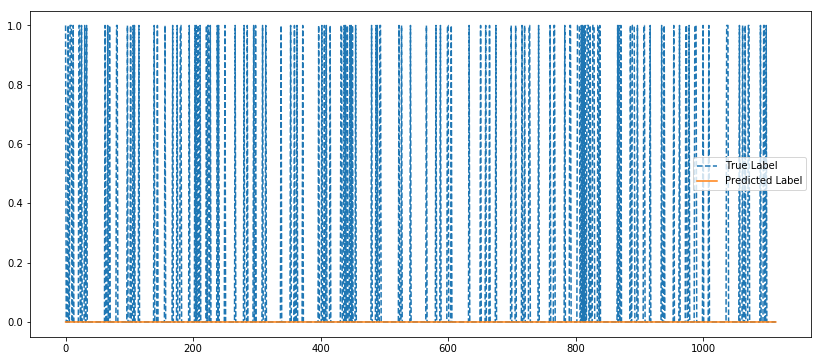

time: 271 ms


In [9]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
ax.plot(y_true, '--', label='True Label')
ax.plot(y_pred, label='Predicted Label')
plt.legend()
plt.show()